# Najboljše videoigre vseh časov

 **Projektna naloga pri predmetu Programiranje 1**

# 0. Priprava podatkov

Preden sploh lahko začnemo z analizo podatkov, moramo seveda pripravit vse potrebno. V ta namen uvozimo knjižnico pandas in vnesemo naše tabele.

In [1]:
import pandas as pd

pd.options.display.max_rows = 100

%matplotlib inline

igre = pd.read_csv("igre.csv")
zanri = pd.read_csv("zanri.csv")

In [2]:
igre

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ..."
1,160779,Tony Hawk's Pro Skater 2,PlayStation,Activision,Sep,2000,98.0,19.0,7.4,639.0,T,2.0,As most major publishers' development efforts ...
2,108362,Grand Theft Auto IV,PlayStation 3,Rockstar Games,Apr,2008,98.0,64.0,7.6,3797.0,M,1.0,What does the American Dream mean today? For N...
3,160751,SoulCalibur,Dreamcast,Namco,Sep,1999,98.0,24.0,8.5,321.0,T,2.0,"This is a tale of souls and swords, transcendi..."
4,108363,Grand Theft Auto IV,Xbox 360,Rockstar Games,Apr,2008,98.0,86.0,7.9,3360.0,M,1.0,What does the American Dream mean today? For N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215521,Atelier Ayesha: The Alchemist of Dusk,PlayStation 3,Koei Tecmo Games,Mar,2013,70.0,17.0,7.7,88.0,T,1.0,Atelier Ayesha: The Alchemist of Dusk follows ...
9996,182135,Payday: The Heist,PlayStation 3,Sony Online Entertainment,Oct,2011,70.0,30.0,6.4,83.0,M,NaN,Players will embark on a spectacular crime spr...
9997,182132,The Sims 3: Pets,PlayStation 3,Electronic Arts,Oct,2011,70.0,16.0,3.9,15.0,T,1.0,Players take creativity by the reins and play ...
9998,110061,Global Agenda,PC,Hi-Rez Studios,Feb,2010,70.0,16.0,7.8,356.0,T,NaN,Global Agenda is a massively multi-player acti...


In [3]:
zanri

,id,zanr
0,160692,Action Adventure
1,160692,Fantasy
2,160779,Sports
3,160779,Alternative
4,160779,Skateboarding
...,...,...
34181,110061,Massively Multiplayer Online
34182,110061,Massively Multiplayer
34183,110061,Sci-Fi
34184,502606,Action Adventure


# 1. Kaj pomeni "najboljša videoigra"?

Da bo naslov te projektne naloge opravičen, bi se spodobilo, da najprej dorečemo, kaj sploh pomeni, da je igra "najboljša". Igre so na spletni strani Metacritic, s katere sem prenesel podatke, razvrščene po oceni **metascore**. Tu jih bomo ocenjevali malo drugače.

Konstruirali bomo lastno metriko za rangiranje. Zakaj je to potrebno, se morda sprešuje bralec. Razlogov je več:
* Neobelani podatki so razvrščeni po **metascore** torej ocenah Strokovnjakov. Ne upoštevamo torej mnenja povprečnega igralca.
* Nikjer ne upoštevamo stevilo ocen, kar lahko pripelje do patoloških primerov. Igra ki ima 5 glasov in oceno 9.0 intuitivno seveda ni enako dobra, kot igra, ki ima 5000 glasov in oceno 8.5.
* Vendar pa bi radi upoštevali, da bo, do neke mere, igra z malo glasovi in dobro oceno boljša od igre z veliko glasovi, ki pravijo, da je zanič.

Dajmo najprej malo preučiti podatke, da vidimo s čim sploh imamo opravka:

###  Userscore

<AxesSubplot:xlabel='glasovi userscore', ylabel='userscore'>

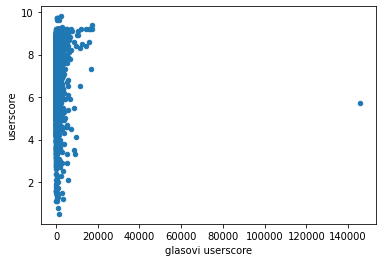

In [63]:
igre.plot.scatter(x="glasovi userscore", y="userscore")

In [70]:
igre[igre["glasovi userscore"] > 10 ** 5]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
115,504733,The Last of Us Part II,PlayStation 4,SCEA,Jun,2020,93.0,121.0,5.7,145922.0,M,1.0,Five years after their dangerous journey acros...,5.7,9.3,15.0


Vredu, zanimiv začetek...

Za bralca, ki ni na tekočem s svetom videoiger, *The Last of Us* je bila ena najbolj uspešnih videoiger za *PlayStation 3* ter *PlayStation 4* in ena najbolj uspešnih videoiger na sploh. Je kakoničen primer, ko zagovarjaš, da igre niso samo streljačine, ampak cel umentniški medij, ki se lahko ob rob postavlja knjigi in filmu. Ko bomo iskali najboljše igre na teh platformah jo bomo gotovo našli.

Skratka, igra je izšla 2013 in uboževalci so čakali 7 let na njeno nadaljevanje, *The Last of Us Part II*, ki pa je bila dokaj kontroverzna. Oddalila se je od sporočila prve igre in se usmerila v LGBT pride vsebine. To, skupaj z napihnjenimi pričakovanji občinstva je pomenilo, da je imelo veliko ljudi kaj za povedat in to se ravno tu pozna.

Morda se sedaj osredotočimo tja, kjer je glavnina podatkov.

<AxesSubplot:xlabel='glasovi userscore', ylabel='userscore'>

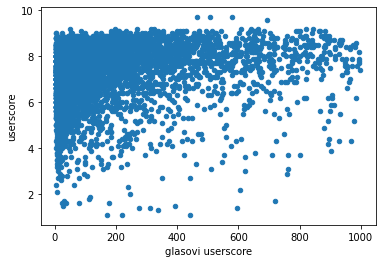

In [66]:
igre[igre["glasovi userscore"] < 1000].plot.scatter(x="glasovi userscore", y="userscore")

Vidimo, da več kot je glasov, boljše igre imamo. Torej je smiselno število glasov upoštevati pri naši oceni. Radi bi upoštevali zgornje točke, tako da naredimo sledeče:

**prilagojen userscore** izračunamo po naslednji formuli: `Up = U * (Gu / (Gu + GuAv))`  
kjer je `U` prvotna ocena, `Gu` število glasov in `GuAv` povprečno število glasov.

S tem smo dosegli sledeče:
* Igre z visoko oceno in velikim številom glasov, bodo obdržale prestižno oceno.
* Igre z nizko oceno in velikim številom glasov, bodo ostale slabo ocenjene.
* Igre z sicer malo glasovi, ampak res dobro oceno, bodo povprečno ali celo nadpovprečno ocenjene.
* Za igre z nizko oceno in malo glasovi smatramo, da niso dovolj popularne, zato se njihova ocena zmanjša.

Če je glasov veliko, ocena ostane skoraj enaka. Če pa je glasov malo, se ocena temu primerno prilagodi, pri čimer pa lahko kaka res dobra igra vseeno izstopa.
Tako smo graf ocene v odvisnosti od glasov nekoliko linealizirali.

In [91]:
def prilagodi_glasove_userscore(tabela_iger):
    def prilagodi(ocena, st_glasov, medijana_glasov):
        return round(((st_glasov) / (st_glasov + medijana_glasov)) * ocena, 2)
    
    tabela_iger["prilagojen userscore"] = prilagodi(
        tabela_iger["userscore"], tabela_iger["glasovi userscore"], (tabela_iger["glasovi userscore"]).mean()
    )
prilagodi_glasove_userscore(igre)

<AxesSubplot:xlabel='glasovi userscore', ylabel='prilagojen userscore'>

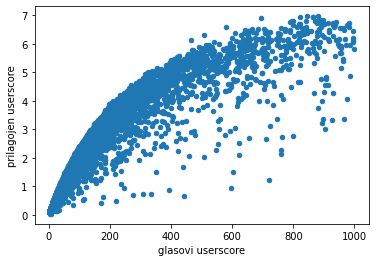

In [92]:
igre[igre["glasovi userscore"] < 1000].plot.scatter(x="glasovi userscore", y="prilagojen userscore")

### Metascore

<AxesSubplot:xlabel='glasovi metascore', ylabel='metascore'>

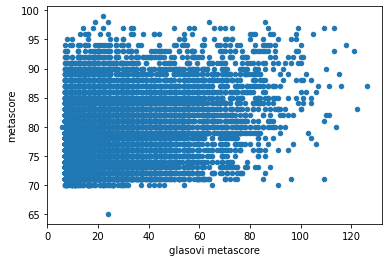

In [60]:
igre.plot.scatter(x="glasovi metascore", y="metascore")

Tu opazimo da kvaliteta iger s številom glasov ne narašča. To je za pričakovati, saj proivajalci pogosto podarijo igro ocenjevalce, da naredijo oceno. 

Število glasov je torej v veliki meri odvisno od podjetji in ga zato tu ne bomo upoštevali. Pravtako igre oceni veliko manj ljudi in so zato števila glasov bolj blizu skupaj.

Oceno strokovnjakov bomo le delili z 10, da bosta userscore in metascore števili istega reda velikosti.

In [93]:
def prilagodi_glasove_metascore(tabela_iger):
    tabela_iger["prilagojen metascore"] = tabela_iger["metascore"] / 10

prilagodi_glasove_metascore(igre)

### Prilagojena ocena

Naša prilagojena ocena bo vlota prilagojenega metascora in userscora.

In ko smo ravno pri tem, bomo še odstranili igre, ki niso ocenjene.

In [94]:
def prilagojena_ocena(tabela_iger):
    tabela_iger["prilagojena ocena"] = tabela_iger["prilagojen userscore"] + tabela_iger["prilagojen metascore"]
    tabela_iger.dropna(subset=["prilagojena ocena"], inplace=True)

prilagojena_ocena(igre)

In [97]:
igre.sort_values("prilagojena ocena", ascending=False)

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis,prilagojen userscore,prilagojen metascore,prilagojena ocena
0,160692,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,Nov,1998,99.0,22.0,9.1,5723.0,E,1.0,"As a young boy, Link is tricked by Ganondorf, ...",8.69,9.9,18.59
110,231309,The Witcher 3: Wild Hunt,PC,Warner Bros. Interactive Entertainment,May,2015,93.0,32.0,9.4,17482.0,M,1.0,With the Empire attacking the Kingdoms of the ...,9.26,9.3,18.56
58,305096,The Last of Us Remastered,PlayStation 4,SCEA,Jul,2014,95.0,70.0,9.2,14486.0,M,8.0,The Last of Us has been rebuilt for the PlaySt...,9.03,9.5,18.53
53,197529,The Last of Us,PlayStation 3,SCEA,Jun,2013,95.0,98.0,9.2,11951.0,M,8.0,Twenty years after a pandemic radically transf...,9.00,9.5,18.50
22,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral...",8.88,9.6,18.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,322597,Fenix Furia,PlayStation 4,Green Lava Studios,Jun,2016,71.0,8.0,5.0,4.0,E,NaN,"Fenix Rage is a stylish, aggravatingly addicti...",0.07,7.1,7.17
9926,163033,Eragon,Game Boy Advance,Sierra Entertainment,Nov,2006,70.0,12.0,7.5,6.0,E10+,1.0,Play as Eragon and his dragon as they set out ...,0.16,7.0,7.16
9954,163252,Still Life,Xbox,The Adventure Company,Jun,2005,70.0,29.0,7.0,6.0,M,1.0,"In Still Life, you play the role of Victoria M...",0.15,7.0,7.15
9945,531025,Sparklite,PC,Merge Games,Nov,2019,70.0,7.0,6.5,6.0,E10+,1.0,Sparklite is an action-adventure set in the wh...,0.14,7.0,7.14


Sedaj imamo našo metriko za ocenjevanje iger in prava analiza podatkov se lahko prične.

# 2. TBA

Kot prvo, bomo ločili igre glede na platformo. Različna strojna oprema in različna implementacija pomeni, da se lahko kvaliteta od platforme do platforme precej razlikuje. Zato bomo v določenih pogledih obravnavali najboljše igre na vsaki platformi posebej.

In [4]:
platforme = igre.platforma.unique()
platforme

array(['Nintendo 64', 'PlayStation', 'PlayStation 3', 'Dreamcast',
       'Xbox 360', 'Wii', 'Xbox One', 'Switch', 'PlayStation 2',
       'PlayStation 4', 'GameCube', 'Xbox', 'PC', 'Wii U',
       'Game Boy Advance', '3DS', 'DS', 'PlayStation Vita', 'PSP',
       'Stadia'], dtype=object)

In [5]:
igre_po_platformi = {}

for platforma in platforme:
    igre_po_platformi[platforma] = igre[igre.platforma == platforma]

igre_po_platformi["PC"]

,id,naslov,platforma,studio,mesec,leto,metascore,glasovi metascore,userscore,glasovi userscore,oznaka,stevilo igralcev,opis
22,103028,Half-Life 2,PC,VU Games,Nov,2004,96.0,81.0,9.1,10760.0,M,1.0,"By taking the suspense, challenge and visceral..."
23,325932,Grand Theft Auto V,PC,Rockstar Games,Apr,2015,96.0,57.0,7.8,6639.0,M,32.0,Los Santos: a sprawling sun-soaked metropolis ...
30,109675,The Orange Box,PC,EA Games,Oct,2007,96.0,34.0,9.2,1803.0,M,32.0,Games included in The Orange Box compilation: ...
36,100055,Half-Life,PC,Sierra Entertainment,Nov,1998,96.0,24.0,9.0,4316.0,M,1.0,Half-Life combines great storytelling in the t...
40,105294,BioShock,PC,2K Games,Aug,2007,96.0,44.0,8.6,4804.0,M,1.0,"Going beyond ""run and gun corridors,"" ""monster..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,113122,Company of Heroes: Tales of Valor,PC,THQ,Apr,2009,70.0,42.0,7.2,216.0,M,NaN,Company of Heroes: Tales of Valor is the next ...
9982,107733,Romance of the Three Kingdoms XI,PC,Koei,Sep,2008,70.0,11.0,7.9,49.0,E10+,8.0,Set during the end of China's Han Dynasty and ...
9987,496865,I Am Setsuna,PC,Square Enix,Jul,2016,70.0,16.0,7.2,62.0,E10+,1.0,"Inspired by Chrono Trigger, I am Setsuna is an..."
9992,306747,Brigador,PC,Stellar Jockeys,Jun,2016,70.0,12.0,7.8,40.0,NaN,1.0,"Choose your vehicle, weapons, pilot, and defen..."


<AxesSubplot:xlabel='metascore', ylabel='userscore'>

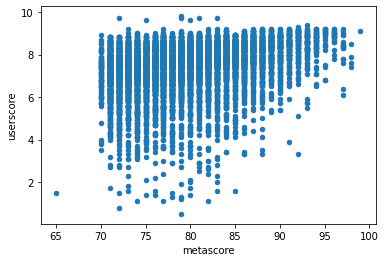

In [62]:
igre.plot.scatter(x="metascore", y="userscore")

<AxesSubplot:xlabel='prilagojen metascore', ylabel='prilagojen userscore'>

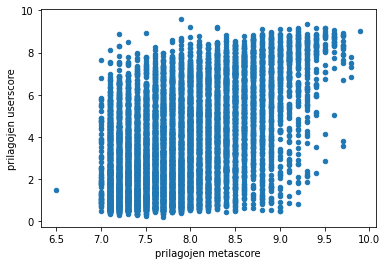

In [67]:
prilagodi_glasove(igre)
igre.plot.scatter(x="prilagojen metascore", y="prilagojen userscore")

<AxesSubplot:xlabel='metascore', ylabel='userscore'>

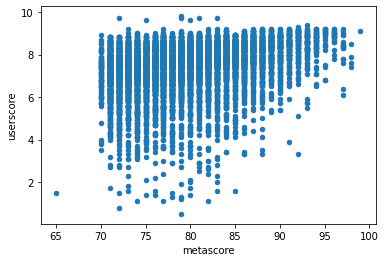

In [68]:
igre.plot.scatter(x="metascore", y="userscore")

In [ ]:
for platforma in platforme:
    igre[igre.platforma == platforma].plot.scatter(x="metascore", y="userscore")

In [ ]:
igre.sort_values("leto")

In [ ]:
igre.groupby("naslov").size().sort_values()

In [ ]:
igre.groupby("platforma").size().sort_values()

In [ ]:
igre[(igre.platforma == "PC")].sort_values("leto", ascending=False)

In [ ]:
# igre[(len(igre.naslov) > 10)]
def fun(naslov):
    return "Creed" in naslov
    
igre[(igre["naslov"].apply(fun)) & (igre["platforma"] == "PC")].sort_values("leto")